In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
path = !pwd
path = path[0]+'/data/'
path

'/home/mic/Projects/github/python/ml-hard/2-part/data/'

In [18]:
df = pd.read_csv(path+"HW_train_main_data.csv")

In [25]:
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

build_year             44.624138
apartment condition    44.524138
max_floor              31.424138
material               31.424138
num_room               31.424138
kitch_sq               31.424138
life_sq                20.913793
floor                   0.541379
id                      0.000000
timestamp               0.000000
full_sq                 0.000000
sub_area                0.000000
price                   0.000000
dtype: float64

In [28]:
### Топ-10 самых дорогих квартир
df.sort_values(by='price', ascending=False).head(10)[['id', 'price']]

,id,price
18117,85073,112444400.0
27095,14154,95255100.0
5829,88100,94932200.0
26225,78059,87549200.0
15217,91175,81827500.0
16898,45584,80388000.0
14321,95572,77305800.0
3163,63901,73377700.0
8573,92747,72611400.0
7755,40136,72380000.0


In [31]:
df.timestamp[0]

'2014-12-30'

In [33]:
df['timestamp_t'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')
df['year'] = df.timestamp_t.dt.year
df['month'] = df.timestamp_t.dt.month

In [49]:
avg_price_ym = df.groupby(['year', 'month'])['price'].mean()
# Convert MultiIndex to a single index
avg_price_ym.index = avg_price_ym.index.map(lambda x: f'{x[0]}-{x[1]:02d}')

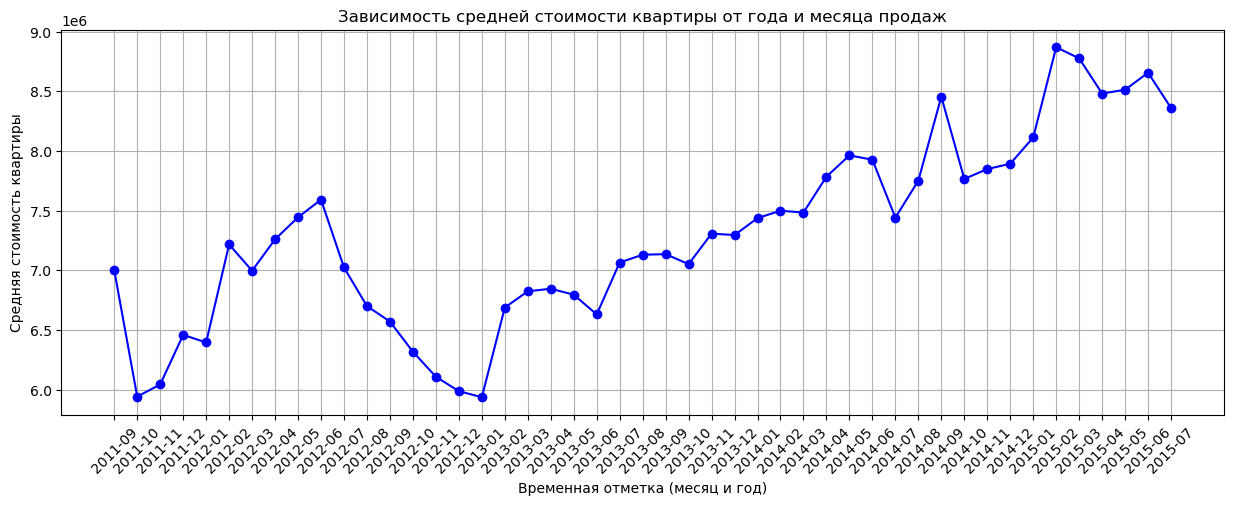

In [51]:
'''
Построить зависимость avg_price_ym средней стоимости квартиры от года и месяца продаж. 
В результате необходимо получить график, где по оси Y расположена средняя стоимость квартиры, 
а по оси X временная отметка в виде сочетания месяца и года
'''
plt.figure(figsize=(15, 5))
plt.plot(avg_price_ym.index, avg_price_ym.values, color='blue', marker='o', linestyle='-')
plt.title('Зависимость средней стоимости квартиры от года и месяца продаж')
plt.xlabel('Временная отметка (месяц и год)')
plt.xticks(rotation=45)
plt.ylabel('Средняя стоимость квартиры')
plt.grid()
plt.show()

In [62]:
df.groupby(['year', 'month'])[['id', 'price']].agg({'price': "max"})[:4]

price
year month            
2011 9      17001000.0
     10     18043800.0
     11     40811000.0
     12     26860200.0

In [ ]:
# id самых дорогих квартир в каждом месяце
df.groupby(['year', 'month'])[['id', 'price']].max()

id        price
year month                    
2011 9      94644   17001000.0
     10     98356   18043800.0
     11     99826   40811000.0
     12     99400   26860200.0
2012 1      99993   24576000.0
     2      99354   38608400.0
     3      99488   62681400.0
     4      99851   34816000.0
     5      99706  112444400.0
     6      99139   35805000.0
     7      99339   36967300.0
     8      99479   33726000.0
     9      99605   63312900.0
     10     99904   80388000.0
     11     99859   29033200.0
     12     99903   43192100.0
2013 1      99875   39923000.0
     2      99901   73377700.0
     3      99670   87549200.0
     4      99917   41500500.0
     5      99499   95255100.0
     6      99795   43173000.0
     7      99981   34334100.0
     8      99829   43960000.0
     9      99973   40560000.0
     10     99916   61800000.0
     11     99450   72196800.0
     12     99948   65585000.0
2014 1      99868   34432000.0
     2      99946   66432000.0
     3      99976   70720000.0
     4      99961   59417300.0
     5      99999   62588500.0
     6      99716   81827500.0
     7      99906   44075200.0
     8      99687   48136000.0
     9      99997   66568400.0
     10     99885   43302000.0
     11     99996   56669500.0
     12     99980   65855900.0
2015 1      99970   61118200.0
     2      99953   77305800.0
     3      99718   94932200.0
     4      99960   55150000.0
     5      99966   72380000.0
     6      99943   46872200.0
     7      99760   41817600.0

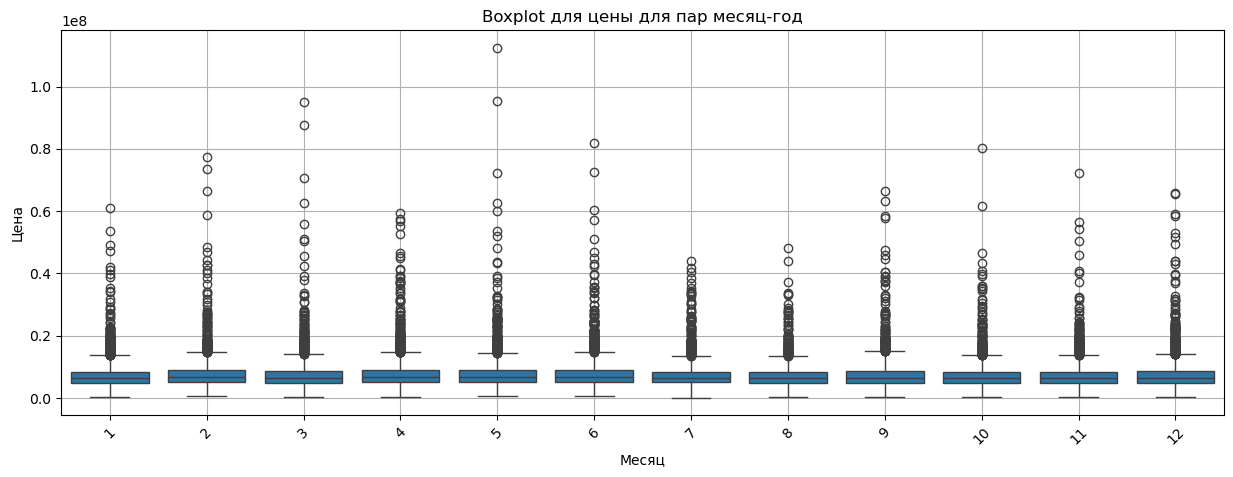

In [ ]:
# Построить boxplot для цены для пар месяц-год
plt.figure(figsize=(15, 5))
sns.boxplot(x='month', y='price', data=df.groupby(['year', 'month']).
plt.title('Boxplot для цены для пар месяц-год')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.grid()
plt.show()